In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import tensorflow as tf
from tensorflow import keras
import tensorflow_core
from tensorflow.keras import layers
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

tf.__version__
# Any results you write to the current directory are saved as output.

'2.1.0'

In [4]:
if __name__ == '__main__':
    img_width, img_height, channels = 128, 128, 3
    input_shape = (img_width, img_height, channels)
    resnet = keras.applications.ResNet50(include_top=False, pooling='avg', input_shape=input_shape)
    model = keras.Sequential()
    model.add(resnet)
    model.add(layers.Dense(1))
    model.layers[0].trainable = False
    model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [5]:
    image_data_list = []
    label = []
    train_image_list = os.listdir("/kaggle/input/emotion-test/")
    random.shuffle(train_image_list)
    for img in train_image_list:
        url = os.path.join('/kaggle/input/emotion-test/' + img)
        image = keras.preprocessing.image.load_img(url, target_size=(128, 128))
        image_data_list.append(keras.preprocessing.image.img_to_array(image))
        label.append(float(img.split('-')[0])-3)
    img_data = np.array(image_data_list)
    img_data = img_data.astype('float32')
    img_data /= 255
    label = np.array(label)
    train_x = img_data
    train_y = label
    print(train_y)

[-2. -1. -1.  2.  0. -1. -1. -1.  0. -1. -1. -1. -2.  0. -1.  0. -1.  1.
 -2.  1. -1.  0.  0. -1. -2. -1. -1. -1.  0.  0.  0.  0. -1.  0. -1.  0.
 -2.  0. -1. -1. -2. -1. -1.  0. -1.  1. -1. -1. -2. -1. -1. -1. -1. -1.
 -2. -1.  1. -1. -1.  0. -2.  0.  0.  0.  1. -2.  2.  0.  0.  1.  0.  0.
 -1. -1.  0. -1.  0. -1. -1. -2. -1. -1.  0.  0.  0. -1.  1. -1.  0. -2.
 -1.  0.  0.  0. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -2. -1. -1.
  0.  0. -1.  1. -1. -1. -2. -1. -1.  0.  1. -1.  1.  0.  0. -2.  2.  1.
  1.  1. -2.  0.  0. -2. -1.  2. -1. -2.  1.  1. -2. -2.  0. -1.  0. -2.
 -1.  0.  0. -2. -1.  0. -1. -2.  1. -2. -1. -2. -1. -1.  0.  1. -1. -1.
  0. -1.  0.  1.  0. -1. -1. -2.  0. -1. -1. -1.  0. -1. -2. -1.  0.  0.
 -1.  1. -1.  0. -1. -1. -2.  0. -1. -1. -2. -1. -2.  0.  1. -2.  0.  1.
  1. -1. -1. -2.  0. -2. -1.  0. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1.
 -2. -1.  0. -1. -2.  1. -1. -1. -2. -1.  1. -1.  2. -1. -2. -1. -2. -1.
 -2.  0. -1. -1.  0.  1.  0.  0. -2. -1.  0. -1. -2

In [6]:
    opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mse',
                  optimizer=opt)
    hist = model.fit(x=train_x, y=train_y, batch_size=64,
                     epochs=50, verbose=1, validation_split=0.2)

Train on 433 samples, validate on 109 samples
Epoch 1/50
433/433 [==============================] - 9s 20ms/sample - loss: 1.7608 - val_loss: 2.7489
Epoch 2/50
433/433 [==============================] - 0s 1ms/sample - loss: 1.1920 - val_loss: 2.7820
Epoch 3/50
433/433 [==============================] - 0s 1ms/sample - loss: 0.9118 - val_loss: 2.9056
Epoch 4/50
433/433 [==============================] - 0s 1ms/sample - loss: 0.7684 - val_loss: 2.8851
Epoch 5/50
433/433 [==============================] - 0s 1ms/sample - loss: 0.6349 - val_loss: 2.8332
Epoch 6/50
433/433 [==============================] - 0s 1ms/sample - loss: 0.5552 - val_loss: 2.8876
Epoch 7/50
433/433 [==============================] - 0s 1ms/sample - loss: 0.5275 - val_loss: 2.9152
Epoch 8/50
433/433 [==============================] - 0s 1ms/sample - loss: 0.4630 - val_loss: 2.9457
Epoch 9/50
433/433 [==============================] - 0s 1ms/sample - loss: 0.4350 - val_loss: 2.9503
Epoch 10/50
433/433 [==============

In [7]:
model.save('/kaggle/working/model.h5')  # 保存模型

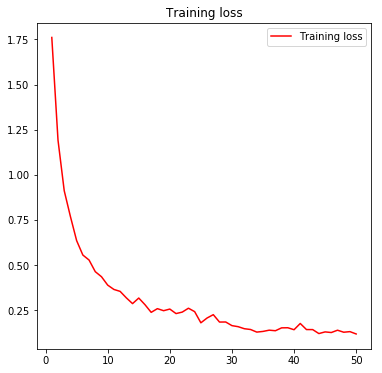

In [9]:
plt.rcParams['figure.figsize'] = (6,6)

loss = hist.history['loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.title('Training loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.legend()

plt.show()

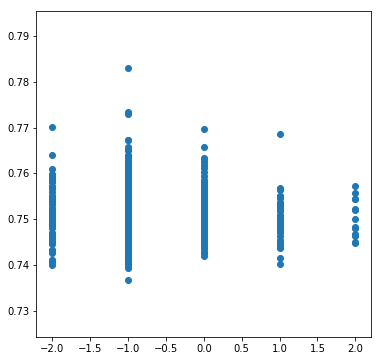

In [10]:
plt.scatter(train_y, model.predict(train_x))

In [15]:
filepath="/kaggle/working/model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                             factor=0.1,
                                                             patience=2,
                                                             cooldown=2,
                                                             min_lr=0.00001,
                                                             verbose=1)
callback_list = [checkpoint, reduce_learning_rate]

In [22]:
model.layers[0].trainable = True
model.compile(loss='mse', optimizer='adam')
history = model.fit(x=train_x, 
                    y=train_y, 
                    batch_size=8,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=callback_list)

Train on 433 samples, validate on 109 samples
Epoch 1/20
424/433 [============================>.] - ETA: 0s - loss: 0.8673
Epoch 00001: val_loss did not improve from 0.93031
433/433 [==============================] - 10s 23ms/sample - loss: 0.8676 - val_loss: 1.6909
Epoch 2/20
424/433 [============================>.] - ETA: 0s - loss: 0.8853
Epoch 00002: val_loss did not improve from 0.93031
433/433 [==============================] - 3s 6ms/sample - loss: 0.8883 - val_loss: 1.7920
Epoch 3/20
424/433 [============================>.] - ETA: 0s - loss: 0.6771
Epoch 00003: val_loss improved from 0.93031 to 0.88592, saving model to /kaggle/working/model.h5
433/433 [==============================] - 4s 9ms/sample - loss: 0.6713 - val_loss: 0.8859
Epoch 4/20
432/433 [============================>.] - ETA: 0s - loss: 0.6270
Epoch 00004: val_loss did not improve from 0.88592
433/433 [==============================] - 3s 6ms/sample - loss: 0.6256 - val_loss: 1.1235
Epoch 5/20
424/433 [==========

In [23]:
model.save('/kaggle/working/model2.h5')  # 保存模型

## 模型测试部分

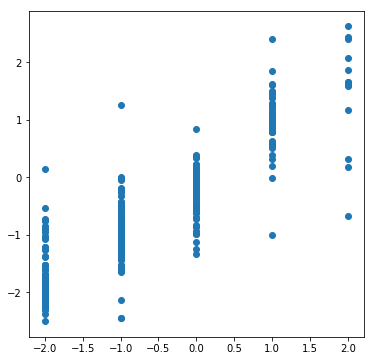

In [24]:
plt.scatter(train_y, model.predict(train_x))

ValueError: x and y must be the same size

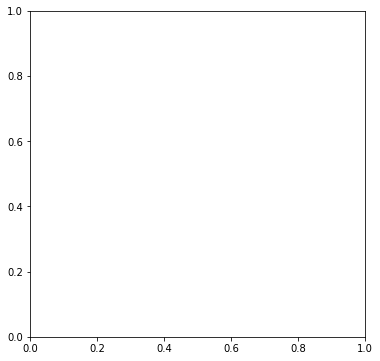

In [27]:
import math
model = keras.models.load_model('/kaggle/working/model2.h5')
plt.scatter(train_x, model.predict(train_x))
plt.plot(train_y, train_y, 'ro')
model.summary()

[ 0. -2.  2.  2. -1.  2. -2.  2. -1. -1.  2. -2.  1. -1. -2.  2.  0.  1.]
[[-0.8684511 ]
 [-0.4633079 ]
 [-0.79185736]
 [ 0.8185698 ]
 [-0.03735315]
 [ 0.5708926 ]
 [-0.6051963 ]
 [ 0.4843712 ]
 [-0.6857528 ]
 [-1.7132069 ]
 [ 0.9284762 ]
 [ 0.16661206]
 [-0.6267483 ]
 [-0.547351  ]
 [-0.19921213]
 [-0.44671524]
 [-0.4803657 ]
 [-0.5177661 ]]


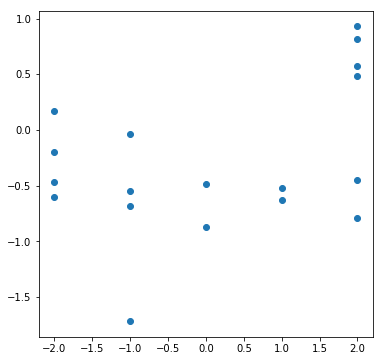

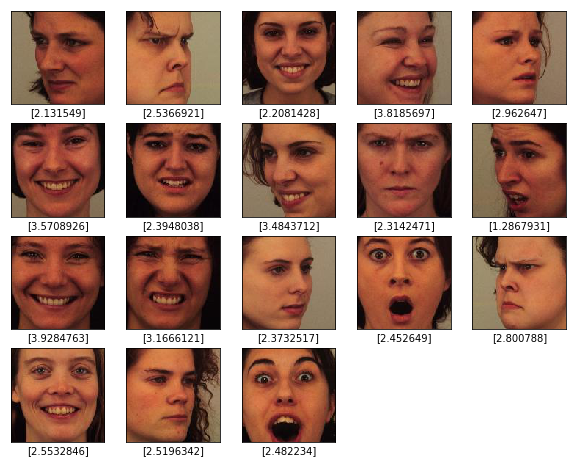

In [33]:
    # Big Data : /kaggle/input/emotiontesdata/
    # Lite Data : 
    test_data_list = []
    test_label = []
    test_image_list = os.listdir("/kaggle/input/emotiontesdata/")
    for img in test_image_list:
        url = os.path.join('/kaggle/input/emotiontesdata/' + img)
        image = keras.preprocessing.image.load_img(url, target_size=(128, 128))
        test_data_list.append(keras.preprocessing.image.img_to_array(image))
        test_label.append(float(img.split('-')[0])-3)
    img_data = np.array(test_data_list)
    img_data = img_data.astype('float32')
    img_data /= 255
    test_label = np.array(test_label)
    test_x = img_data
    test_y = test_label
    print(test_y)
    print(model.predict(test_x))
    plt.scatter(test_y, model.predict(test_x))
    
    predictions = model.predict(test_x)
    plt.figure(figsize=(10,10))
    for i in range(0,len(test_image_list)):
        width=int(math.sqrt(len(test_image_list)))+1
        plt.subplot(width,width,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_x[i])
        plt.grid(False)
        plt.xlabel(predictions[i]+3.0)
    plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


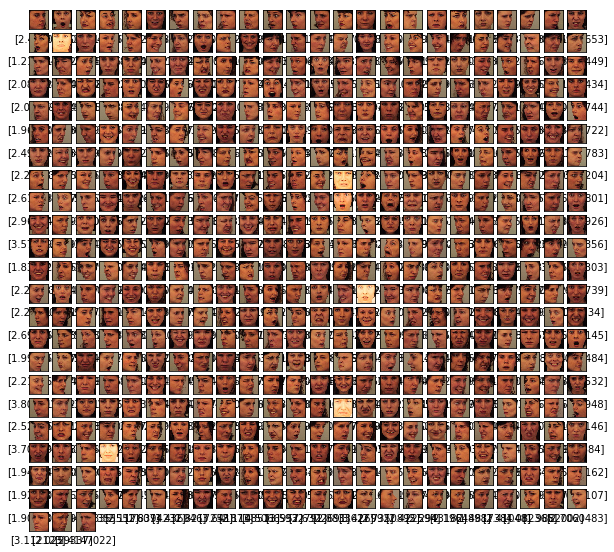

In [26]:
    # 老版本测试
    test_data_list = []
    test_image_list = os.listdir("/kaggle/input/emotiontesdata/")
    for img in test_image_list:
        url = os.path.join('/kaggle/input/emotiontesdata/' + img)
        image = keras.preprocessing.image.load_img(url, target_size=(128, 128))
        test_data_list.append(keras.preprocessing.image.img_to_array(image))
    img_data = np.array(test_data_list)
    img_data = img_data.astype('float32')
    img_data /= 255
    test_data = img_data
    predictions = model.predict(test_data)
    plt.figure(figsize=(10,10))
    for i in range(0,len(test_image_list)):
        width=int(math.sqrt(len(test_image_list)))+1
        plt.subplot(width,width,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_data[i])
        plt.grid(False)
        plt.xlabel(predictions[i]+3.0)
    plt.show()

In [ ]:
best_model.evaluate(x=x_test, y=y_test)
plt.scatter(test_y, best_model.predict(text_x))
plt.plot(test_y, test_y, 'ro')